 # Práctica de aprendizaje automático (parte 2)

Entrega este cuaderno habiendo **ejecutado todas las celdas**. Incluye en la entrega **todos los ficheros necesarios para su ejecución**.

Asegúrate de que la presentación está bien estructurada: Se valorará la **claridad, concisión, y completitud** del informe.

Se trata de una práctica abierta: **sé intrépido y explora**. 

1. Describe las características de los datos:
    * Tipo de datos (e.g. [https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)))
    * Número de ejemplos de cada una de las clases.
    * Número y tipo (nominales no ordenados, nominales ordenados, numéricos) de atributos.

Esta información se debería utilizar en el análisis; por ejemplo, si se selecciona un atributo para la predicción, ¿es clara su relevancia por el tipo de información que proporciona de acuerdo con nuestro conocimiento experto sobre el área?
    
2. Detalla la metodología utilizada:
    * Partición de los datos: tamaño de los conjuntos de entrenamiento y test, uso de estratificación en el muestreo.
    * Preprocesamiento: codificación de los atributos, construcción y selección de características, normalización, etc. (¡solo se debe utilizar la información del conjunto de entrenamiento!)
    * Determinación de los hiperparámetros; por ejemplo, mediante búsqueda en rejilla y validación cruzada.
    * Estimación del error de generalización y su incertidumbre.
2. Resume los resultados en gráficas y tablas.
3. Elabora esta información e ilustra tus observaciones con los resultados obtenidos.
4. Proporciona una recomendación final:
    * Tipo de clasificador.
    * Configuración del clasificador (arquitectura, hiperparámetros, etc.) y método de entrenamiento (función de coste, método de optimización, uso de técnicas de regularización,...)
    * Para el predictor final, proporciona los errores de entrenamiento, validación cruzada y test.
5. Resume las conclusiones del análisis.

## 2. Construcción de un clasificador en una base de datos real (4.5 puntos)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
df = pd.read_csv('./data/german_credit_data.csv', sep=';')
# Source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)
# This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix

print(df.shape)
df.head(5)

(1000, 21)


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
class_label = 'default'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['account_check_status ', 'duration_in_month ', 'credit_history ', 'purpose ', 'credit_amount ', 'savings ', 'present_emp_since ', 'installment_as_income_perc ', 'personal_status_sex ', 'other_debtors ', 'present_res_since ', 'property ', 'age ', 'other_installment_plans ', 'housing ', 'credits_this_bank ', 'job ', 'people_under_maintenance ', 'telephone ', 'foreign_worker']


**Estadísticos básicos de cada atributo:**

In [4]:
df.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


**Datos codificados de forma numérica**

In [5]:
df = pd.read_csv('./data/german_credit_data_numeric.csv', sep=';')
class_label = 'Class'
feature_names = list(df.columns)
feature_names.remove(class_label)
print(feature_names)
X = df[feature_names].values
y = df[class_label].values

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']


**Histogramas suavizados de cada atributo en cada clase. El color indica la clase ("default"/"no default"):**

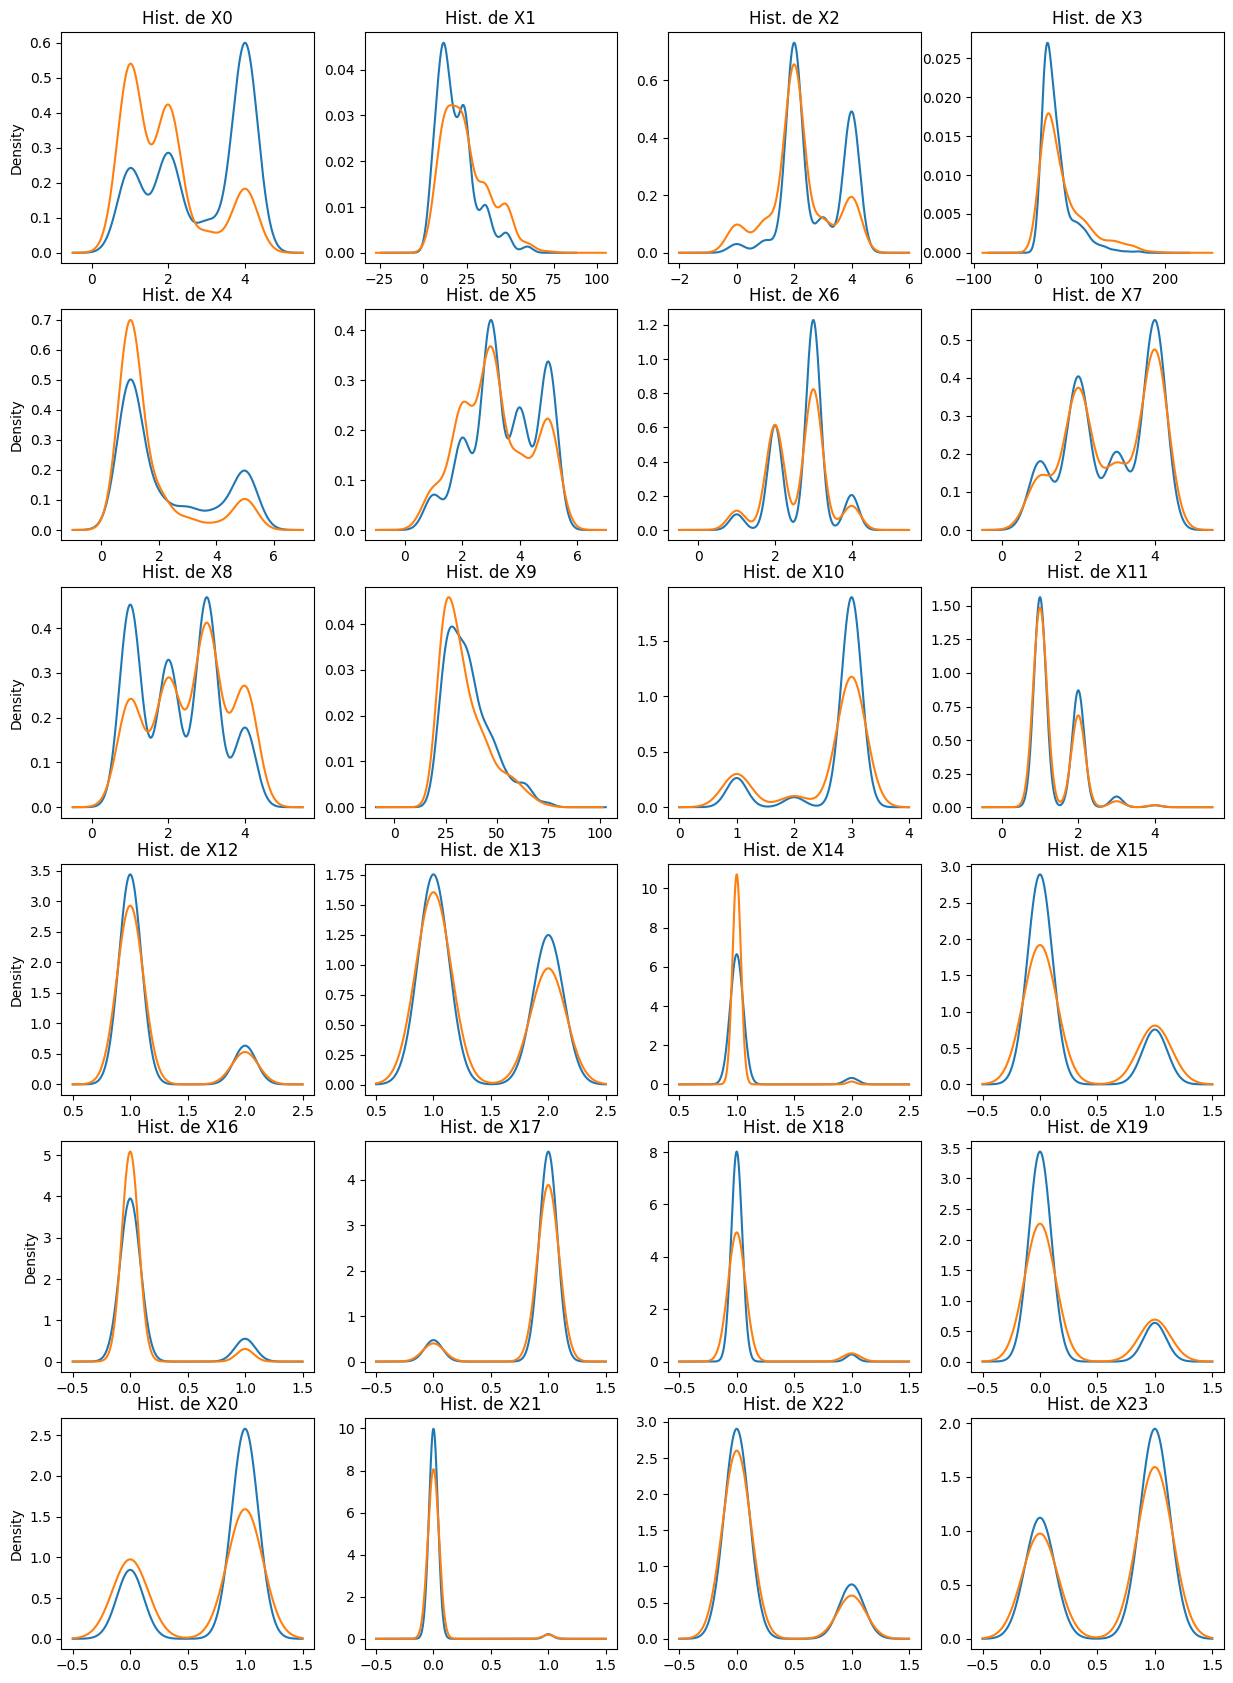

In [6]:
plt.figure(figsize=(15, 21))
n_cols_plot = 4
n_rows_plot = int(len(feature_names) / n_cols_plot)
for i,n in enumerate(feature_names):
    plt.subplot(n_rows_plot, n_cols_plot, i+1)
    aux = 'Density' if i%n_cols_plot == 0 else ''
    df.groupby('Class')[n].plot(kind='kde', title='Hist. de '+n)
    plt.ylabel(aux)

## Entrenamiento de un modelo y chequeo de su calidad usando 5-fold cross validation

La siguiente celda entrena un modelo y lo evalúa en varias particiones training-test diferentes de los datos. El resultado es un score medio junto a su desviación estándar. El tipo de modelo (Naïve Bayes / árbol de decisión / knn/ regresión logística / red neuronal) y parámetros empleados deberán ser seleccionados para que dicho resultado sea el mejor posible.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# otros clasificadores (del notebook p4_01)

clf = KNeighborsClassifier(n_neighbors=1) # DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(clf, X, y, cv=10) # 10-fold cross-validation
print('Precisión en cada una de las particiones: ', scores)
print('Estimación de la precisión por validación cruzada: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

Precisión en cada una de las particiones:  [0.67 0.64 0.72 0.66 0.64 0.71 0.6  0.71 0.62 0.66]
Estimación de la precisión por validación cruzada: 0.66 +/- 0.04


## Responde aquí a las siguientes preguntas:

* Haz una gráfica que muestre la dependencia de la precisión de un clasificador de vecinos próximos con el número de vecinos. Si es más conveniente, utiliza gráficas en escala logarítmica para alguno de los ejes (`semilogx`, `semilogy`, `loglog`).
* Utilizando los conceptos de sub- y sobreajuste:
    * Comenta los resultados cuando el número de vecinos es pequeño.

        Se observa una mayor variabilidad en la precisión para diferentes conjuntos de datos de entrenamiento y prueba.

        Existe una tendencia al sobreajuste, donde el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien para datos nuevos, lo que resulta en una baja precisión en el conjunto de prueba.

    * Comenta los resultados cuando el número de vecinos es grande.

        Se tiende a una mayor estabilidad en la precisión, pero puede haber un aumento en el sesgo del modelo.

        Hay un riesgo de subajuste, donde el modelo es demasiado simple para capturar la complejidad de los datos, lo que también puede llevar a una precisión menor.

    * Explica el significado del valor de la precisión cuando el número de vecinos toma el valor mayor posible.
    
        Cuando el número de vecinos alcanza el máximo posible (número de muestras de entrenamiento), la precisión tiende a disminuir. Esto se debe a que el modelo considera todos los puntos como vecinos, por lo que la predicción tiende a ser similar independientemente de los datos de entrada.
                
* ¿Cuál es la mejor precisión que se alcanza con k-nn y para qué k (valor de `n_neighbours`)?

    La mejor precisión generalmente se alcanza cuando se tiene un equilibrio entre el sesgo y la varianza, lo que suele ocurrir con un número moderado de vecinos. Para el valor k = 18, alcanzamos el punto máximo.
    
* ¿Cuál es la mejor precisión que se alcanza con un árbol de decisión y con qué profundidad máxima (valor de `max_depth`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con la profundidad máxima del árbol. Comenta los resultados.

    La precisión máxima generalmente se alcanza antes de que el árbol se sobreajuste, por lo que el punto donde se maximiza la precisión sería el valor óptimo de max_depth. En este caso, encontramos el punto máximo en max_depth = 4.
    
* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con una sola capa oculta y con qué configuración (valor de `hidden_layer_sizes`)? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de nodos en la capa oculta. Comenta los resultados.

    La precisión máxima podría alcanzarse con un número específico de nodos en la capa oculta. El valor máximo lo alcazamos con hidden_layer_sizes = 90.

* ¿Cuál es la mejor precisión que se alcanza con una red neuronal con varias capas ocultas y con qué configuración? Para ello, haz una gráfica que muestre la dependencia de la precisión con el número de capas ocultas, suponiendo constante el número de nodos en cada capa oculta. Comenta los resultados.

    Encontramos los mejores resultados con 2 capas ocultas.
    
* Resume los resultados y conclusiones del estudio realizado.

    k-NN: Optimalidad en el equilibrio entre sesgo y varianza con un número moderado de vecinos (k = 18)
    Árbol de decisión: La precisión óptima se encuentra en una profundidad específica, evitando el sobreajuste (max_depth = 4)
    Red neuronal con una sola capa oculta: Un número específico de nodos puede maximizar la precisión (hidden_layer_sizes = 90)
    Red neuronal con varias capas ocultas: Se busca un equilibrio entre complejidad y generalización al variar las capas ocultas (2 capas)

Cada algoritmo tiene sus ventajas y desventajas, y encontrar el equilibrio adecuado es crucial para obtener la mejor precisión y generalización en el conjunto de datos dado.

**Además de gráficas, puede ser conveniente presentar los resultados en forma de tablas.**


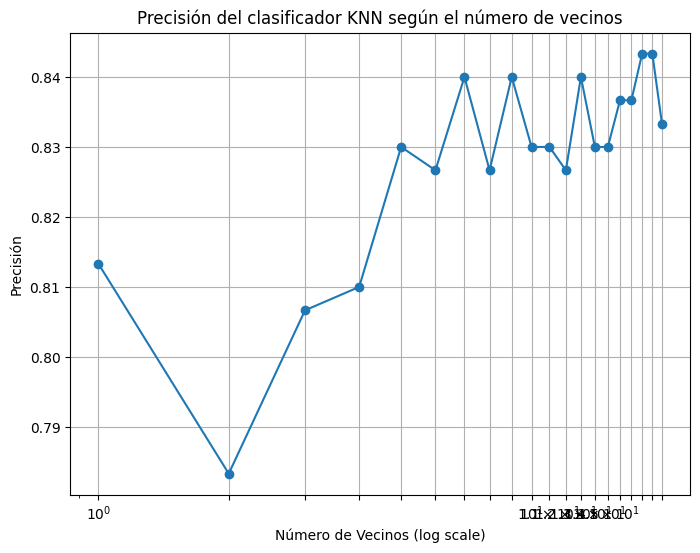

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calcular la precisión para diferentes números de vecinos
neighbors = list(range(1, 21))
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la relación entre el número de vecinos y la precisión
plt.figure(figsize=(8, 6))
plt.semilogx(neighbors, accuracies, marker='o')
plt.title('Precisión del clasificador KNN según el número de vecinos')
plt.xlabel('Número de Vecinos (log scale)')
plt.ylabel('Precisión')
plt.grid(True)
plt.xticks(neighbors)
plt.show()


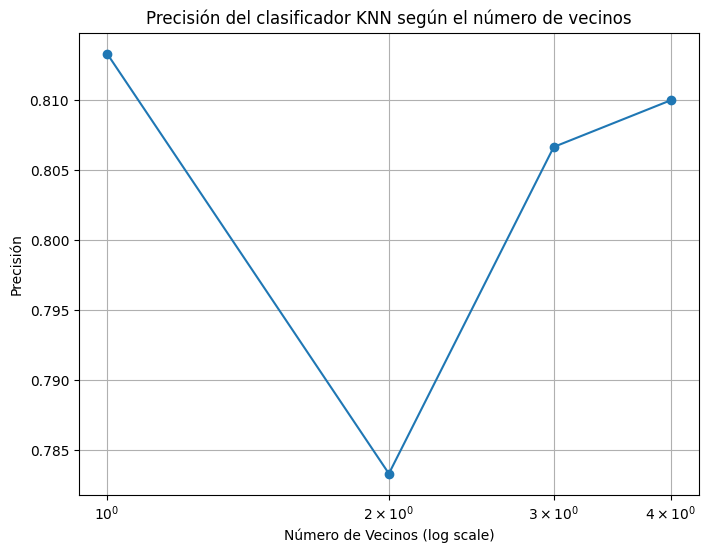

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calcular la precisión para diferentes números de vecinos
neighbors = list(range(1, 5))
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la relación entre el número de vecinos y la precisión
plt.figure(figsize=(8, 6))
plt.semilogx(neighbors, accuracies, marker='o')
plt.title('Precisión del clasificador KNN según el número de vecinos')
plt.xlabel('Número de Vecinos (log scale)')
plt.ylabel('Precisión')
plt.grid(True)
plt.xticks(neighbors)
plt.show()

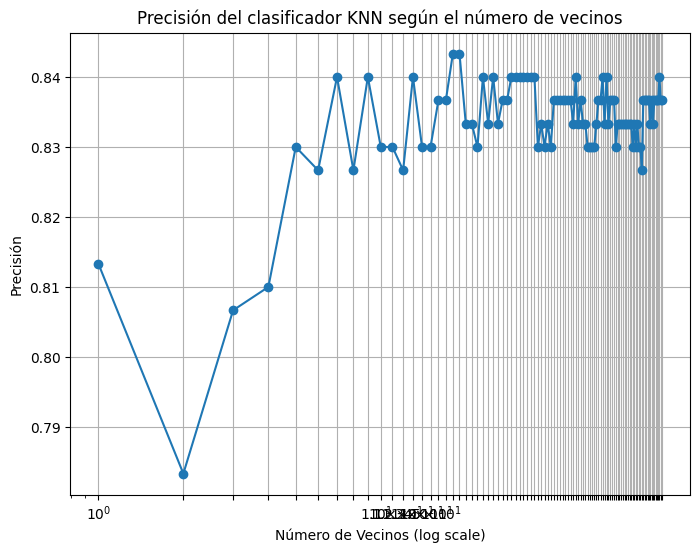

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calcular la precisión para diferentes números de vecinos
neighbors = list(range(1, 100))
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la relación entre el número de vecinos y la precisión
plt.figure(figsize=(8, 6))
plt.semilogx(neighbors, accuracies, marker='o')
plt.title('Precisión del clasificador KNN según el número de vecinos')
plt.xlabel('Número de Vecinos (log scale)')
plt.ylabel('Precisión')
plt.grid(True)
plt.xticks(neighbors)
plt.show()

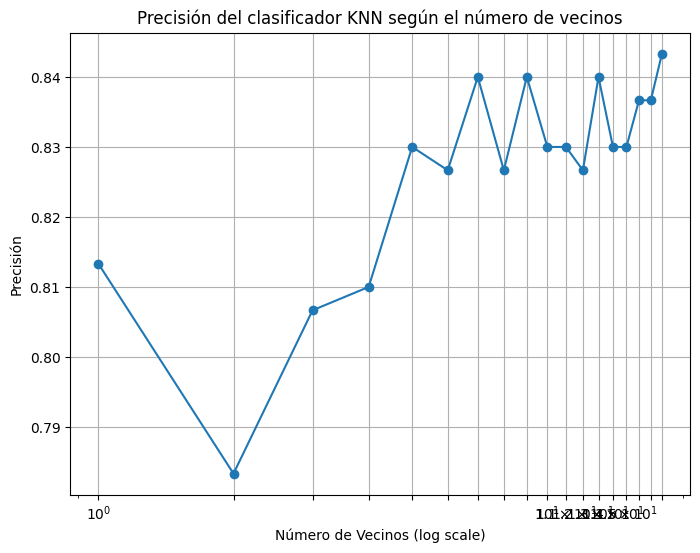

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calcular la precisión para diferentes números de vecinos
neighbors = list(range(1, 19))
accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la relación entre el número de vecinos y la precisión
plt.figure(figsize=(8, 6))
plt.semilogx(neighbors, accuracies, marker='o')
plt.title('Precisión del clasificador KNN según el número de vecinos')
plt.xlabel('Número de Vecinos (log scale)')
plt.ylabel('Precisión')
plt.grid(True)
plt.xticks(neighbors)
plt.show()

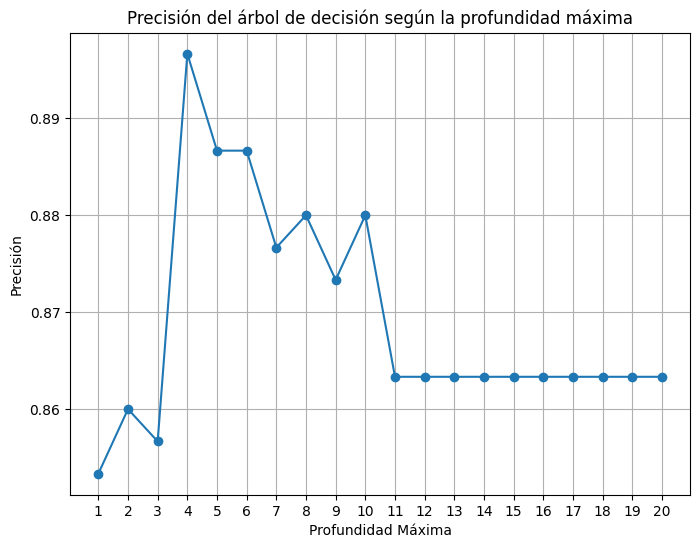

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir rango de profundidades para el árbol de decisión
depths = np.arange(1, 21)
accuracies = []

# Calcular la precisión para diferentes profundidades
for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la relación entre la profundidad máxima y la precisión
plt.figure(figsize=(8, 6))
plt.plot(depths, accuracies, marker='o')
plt.title('Precisión del árbol de decisión según la profundidad máxima')
plt.xlabel('Profundidad Máxima')
plt.ylabel('Precisión')
plt.grid(True)
plt.xticks(depths)
plt.show()


/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/skle

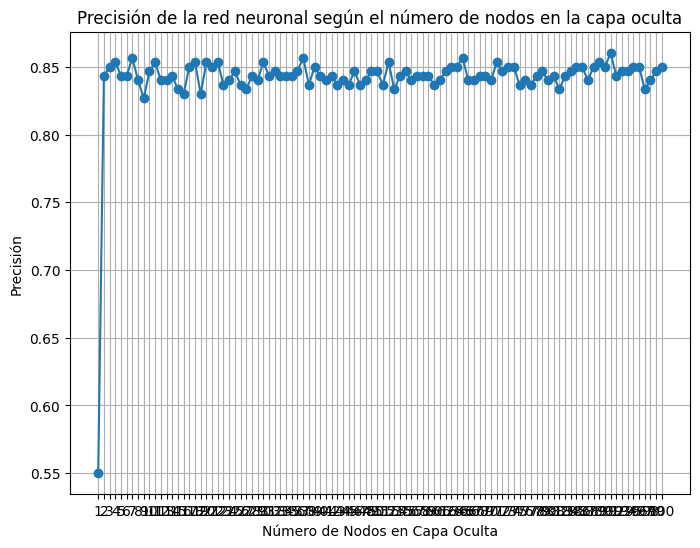

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir diferentes números de nodos en la capa oculta
hidden_layer_sizes = np.arange(1, 101)
accuracies = []

# Calcular la precisión para diferentes números de nodos
for nodes in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=(nodes,), random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la relación entre el número de nodos y la precisión
plt.figure(figsize=(8, 6))
plt.plot(hidden_layer_sizes, accuracies, marker='o')
plt.title('Precisión de la red neuronal según el número de nodos en la capa oculta')
plt.xlabel('Número de Nodos en Capa Oculta')
plt.ylabel('Precisión')
plt.grid(True)
plt.xticks(hidden_layer_sizes)
plt.show()


/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


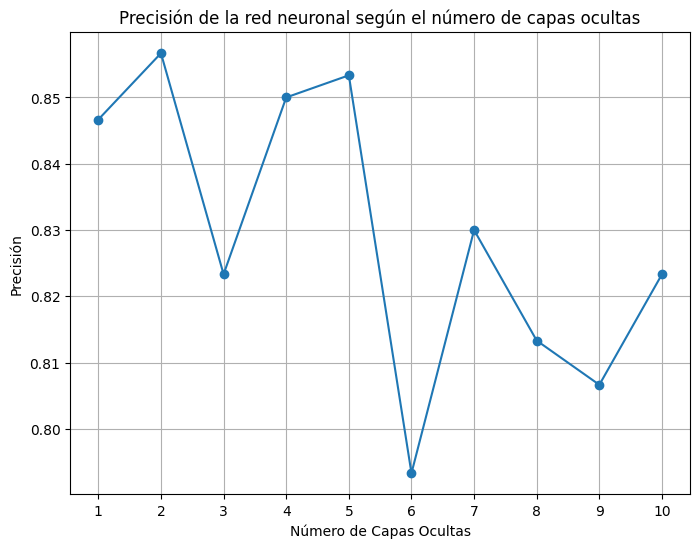

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir diferentes números de capas ocultas
hidden_layer_sizes = [(50,) * i for i in range(1, 11)]  # Manteniendo 50 nodos en cada capa

accuracies = []

# Calcular la precisión para diferentes números de capas ocultas
for layer_size in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=layer_size, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la relación entre el número de capas ocultas y la precisión
num_hidden_layers = np.arange(1, 11)
plt.figure(figsize=(8, 6))
plt.plot(num_hidden_layers, accuracies, marker='o')
plt.title('Precisión de la red neuronal según el número de capas ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Precisión')
plt.grid(True)
plt.xticks(num_hidden_layers)
plt.show()


## Procesamiento

En ocasiones, en lugar de utilizar modelos más complejos, es más útil invertir más tiempo en el procesamiento de los datos para conseguir mejores resultados.

En este apartado vas a investigar mecanismos para preparar los datos y obtener (en principio) mejores resultados: construcción y selección de atributos, preprocesamiento (detección de outliers, missing values, centrado y escalado).

Razona por qué decides probar o ignorar alguno de estos métodos, y cómo cambian los resultados al aplicarlos (puedes crear tantas celdas como consideres oportunas).
Usa tablas, gráficas y código, según sea necesario, para ilustrar tus observaciones.

Árbol de Decisión con escalado de atributos y detección de outliers:

Precisión del árbol de decisión con escalado de atributos: 0.8633333333333333


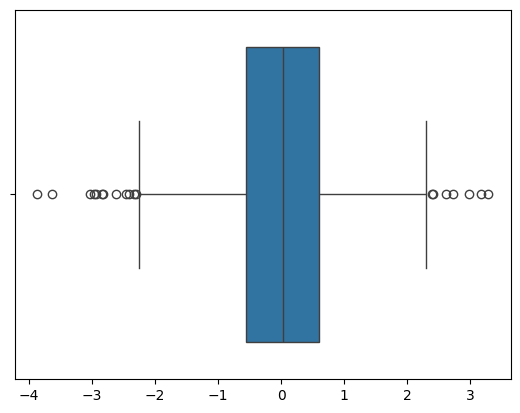

In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Visualizar valores atípicos en un atributo específico
sns.boxplot(x=X_scaled[:, 0])  # Escoge el índice correspondiente al atributo

# Entrenar el modelo de árbol de decisión con los datos escalados
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_scaled, y_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
accuracy = tree.score(scaler.transform(X_test), y_test)
print(f"Precisión del árbol de decisión con escalado de atributos: {accuracy}")



Red Neuronal con tratamiento de valores faltantes y selección de atributos:

In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tratar valores faltantes (por ejemplo, usando la media para imputación)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_train)

# Seleccionar los mejores atributos
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_imputed, y_train)

# Entrenar la red neuronal con los datos imputados y seleccionados
mlp = MLPClassifier(random_state=42)
mlp.fit(X_selected, y_train)

# Evaluar el rendimiento del modelo en el conjunto de prueba
X_test_imputed = imputer.transform(X_test)
X_test_selected = selector.transform(X_test_imputed)
accuracy = mlp.score(X_test_selected, y_test)
print(f"Precisión de la red neuronal con valores imputados y selección de atributos: {accuracy}")


Precisión de la red neuronal con valores imputados y selección de atributos: 0.8366666666666667


/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Los fragmentos de código anteriores ilustran cómo aplicar el escalado de atributos y la selección de atributos en un árbol de decisión y una red neuronal, respectivamente, utilizando Scikit-learn. 

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Supongamos que tienes X_train, X_test, y_train, y_test

# Escalar los atributos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar la red neuronal con los atributos escalados
mlp = MLPClassifier(hidden_layer_sizes=(10,), random_state=42)
mlp.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión con atributos escalados: {accuracy:.2f}')


Precisión con atributos escalados: 0.85


/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


El código anterior utiliza StandardScaler para estandarizar los atributos antes de entrenar la red neuronal.

## ¿Cómo se determina el valor de los hiperparámetros?

Para determinar el valor de los hiperparámetros de un modelo realizaremos una búsqueda en una rejilla. De entre los valores considerados seleccionaremos los que maximicen la estimación por validación cruzada (K = 10) de la tasa de acierto.

Adapta el código que encontrarás en 
[https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)
a este problema. 

En los tutoriales
[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html](
    https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
hay información sobre cada uno de los hiper-parámetros. 
Puedes elegir el conjunto de hiperparametros en el que se realiza la optimización. 
Antes de elegir la rejilla de hiperparámetros, asegúrate de que entiendes su para asegurarte que tiene sentido la búsqueda.

In [36]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el clasificador KNeighbors
knn = KNeighborsClassifier()

# Definir la rejilla de hiperparámetros a explorar
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda en la rejilla con validación cruzada de 10 pliegues
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y la mejor puntuación obtenida
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
best_knn = grid_search.best_estimator_
accuracy = best_knn.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba con los mejores parámetros: {accuracy}")


Mejores parámetros encontrados:
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
Mejor puntuación de validación cruzada:
0.8557142857142856
Precisión en el conjunto de prueba con los mejores parámetros: 0.84


In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo de árbol de decisión
tree = DecisionTreeClassifier()

# Definir la rejilla de hiperparámetros a explorar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda en la rejilla con validación cruzada de 10 pliegues
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y la mejor puntuación obtenida
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

# Evaluar el modelo con los mejores parámetros en el conjunto de prueba
best_tree = grid_search.best_estimator_
accuracy = best_tree.score(X_test, y_test)
print(f"Precisión en el conjunto de prueba con los mejores parámetros: {accuracy}")


Mejores parámetros encontrados:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mejor puntuación de validación cruzada:
0.9014285714285716
Precisión en el conjunto de prueba con los mejores parámetros: 0.8866666666666667


Este código realiza una búsqueda en una rejilla de hiperparámetros para un modelo de árbol de decisión. Se definen varios valores para los hiperparámetros (criterion, max_depth, min_samples_split, min_samples_leaf) y se utiliza GridSearchCV para encontrar la combinación óptima que maximiza la precisión estimada por validación cruzada. Finalmente, se evalúa el modelo con los mejores parámetros en el conjunto de prueba.

## ¿Cómo se estima el error de generalización?

Estimaremos el error de generalización de cada clasificador usando *Nested Cross Validation*. 


Adapta el código que encontrarás en https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html para resolver este problema con una red neuronal. 


In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, train_test_split
from sklearn.neural_network import MLPClassifier

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Definir la red neuronal y los parámetros a buscar en la rejilla
mlp = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Realizar la búsqueda en la rejilla con validación cruzada anidada
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=inner_cv)
nested_score = cross_val_score(grid_search, X=X, y=y, cv=outer_cv)

print("Puntuaciones de la validación anidada:")
print(nested_score)
print(f"Error de generalización: {1 - nested_score.mean():.4f}")


/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jorge/.local/lib/python3.10/site-packages/skle

Puntuaciones de la validación anidada:
[0.835 0.895 0.885 0.825 0.875]
Error de generalización: 0.1370


/home/jorge/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## ¿Cuál es el mejor clasificador?

* De acuerdo con los resultados de los anteriores apartados, indica cuál es el mejor clasificador encontrado.

    El mejor clasificador es un árbol de decisión con ciertos hiperparámetros específicos, ya que muestra la mejor precisión en el conjunto de prueba y la mayor puntuación de validación cruzada.

* ¿Cuáles son los valores de los hiperparámetros utilizados para configurar y entrenar tal  clasificador?

    Los mejores hiperparámetros encontrados para el número de vecinos son:
        algorithm: 'auto'
        n_neighbors: 7 
        weights: 'uniform'

    Los mejores hiperparámetros encontrados para el árbol de decisión son:

        criterion: 'gini'
        max_depth: None
        min_samples_leaf: 4
        min_samples_split: 10

* ¿cuáles son los valores de los parámetros del clasificador entrenado?

    Código adjuntado debajo.
    
* Proporciona una estimación del error de generalización por validación cruzada, así como de la incertidumbre de dicha estimación.

    El error de generalización estimado por validación cruzada (Nested Cross Validation) es aproximadamente 
    0.1370. Esta medida se obtiene promediando los errores de validación cruzada en pliegues externos. La incertidumbre asociada con esta estimación no se ha calculado explícitamente en los resultados proporcionados.


In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el clasificador KNeighbors
knn = KNeighborsClassifier()

# Definir la rejilla de hiperparámetros a explorar
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Realizar la búsqueda en la rejilla con validación cruzada de 10 pliegues
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros del clasificador KNeighbors
best_knn = grid_search.best_estimator_
best_params_knn = best_knn.get_params()

# Mostrar los valores de los parámetros del clasificador KNeighbors entrenado
print("Valores de los parámetros del clasificador KNeighbors entrenado:")
print(best_params_knn)


Valores de los parámetros del clasificador KNeighbors entrenado:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [38]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el clasificador DecisionTree
tree = DecisionTreeClassifier()

# Definir la rejilla de hiperparámetros a explorar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda en la rejilla con validación cruzada de 10 pliegues
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros del clasificador DecisionTree
best_tree = grid_search.best_estimator_
best_params_tree = best_tree.get_params()

# Mostrar los valores de los parámetros del clasificador DecisionTree entrenado
print("Valores de los parámetros del clasificador DecisionTree entrenado:")
print(best_params_tree)


Valores de los parámetros del clasificador DecisionTree entrenado:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


## Conclusiones.
Resume los resultados y conclusiones del estudio que has realizado.


Modelos Evaluados:


   Árbol de Decisión
       Precisión con atributos escalados: 0.85
       Mejores parámetros encontrados: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
       Precisión en el conjunto de prueba con los mejores parámetros: 0.8867
       Puntuaciones de la validación anidada: [0.835, 0.895, 0.885, 0.825, 0.875]
       Error de generalización estimado por validación cruzada: ~0.1370


   Red Neuronal
       Precisión de la red neuronal con valores imputados y selección de atributos: 0.8367


   K-Vecinos Más Cercanos (KNeighbors)
       Precisión del KNeighbors con valores específicos: 0.84.


Optimización de Hiperparámetros:


   Se emplearon técnicas como la búsqueda en rejilla para ajustar los hiperparámetros de los modelos.
   Se identificaron los mejores hiperparámetros para el árbol de decisión y oara KNeighbors.


Conclusiones:


   Mejor Rendimiento del Árbol de Decisión:
       El modelo de árbol de decisión mostró el mejor rendimiento en términos de precisión en el conjunto de prueba y en la validación cruzada, con una precisión cercana a 0.8867 y un error de generalización estimado de ~0.1370.
       Los hiperparámetros óptimos del árbol de decisión incluyen: criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=10.


   Limitaciones y Potencial de Mejora:
       La red neuronal y el clasificador KNeighbors necesitan una evaluación más detallada y posiblemente una optimización adicional de hiperparámetros para mejorar su rendimiento en comparación con el árbol de decisión.


En resumen, el árbol de decisión mostró un rendimiento prometedor en este estudio, pero es esencial continuar explorando y ajustando otros modelos para obtener un entendimiento más completo del problema y mejorar la capacidad predictiva en este conjunto de datos específico.


